# Сравнение поисковых деревьев
### Выполнили Вихрев И., Репин В. гр 382006-3м

In [127]:
import sys
from pathlib import Path
import random
import time
import statistics as stat
sys.path.append(str(Path.cwd().resolve()/'python_bindings'))
import trees

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'whitegrid', rc={'figure.figsize':(20, 10)})

In [129]:
dir(trees)

['AVLTreeInt',
 'AVLTreeString',
 'RBTreeInt',
 'RBTreeString',
 'SortedArrInt',
 'SortedArrString',
 'SplayTreeInt',
 'SplayTreeString',
 'TreapInt',
 'TreapString',
 '__builtins__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__test__']

In [130]:
def evaluate(tree, unique_set, count_rot = False):
    total = 0
    insert_time = []
    search_time = []
    delete_time = []
    rotations_count = []
    
    shuffled_set = random.sample(unique_set, len(unique_set))
    # insertion and searching time
    start_total = time.time_ns()
    for idx, n in enumerate(unique_set):
        insert_mean = 0
        delete_mean = 0
        search_mean = 0
        tree.insert(n)
        if (idx == 0): continue
        for i in range(10):
            el = random.randrange(idx)
            delete_mean += tree.delete(unique_set[el])/10
            insert_mean += tree.insert(unique_set[el])/10
            search_mean += tree.search(unique_set[random.randrange(idx+1)])/10
        insert_time.append(insert_mean)
        delete_time.append(delete_mean)
        search_time.append(search_mean)     
        
        if(count_rot):
            rotations_count.append(tree.rotations_num)
        
    end_total = time.time_ns()
    total = end_total - start_total
    print(f'Insert, Mean : {stat.mean(insert_time)*10**(3):.6f} ms.,  Max {max(insert_time)*10**(3):.6f} ms.')
    print(f'Search, Mean : {stat.mean(search_time)*10**(3):.6f} ms.,  Max {max(search_time)*10**(3):.6f} ms.')
    print(f'Delete, Mean : {stat.mean(delete_time)*10**(3):.6f} ms.,  Max {max(delete_time)*10**(3):.6f} ms.')
    print(f'Total time {(total)*10**(-9):.6f}, sec')
    return (insert_time, search_time, delete_time, rotations_count)

In [131]:
unique_num_set = random.sample(range(0, 10**7), 10**6)
num = range(0, len(unique_num_set))
x = [i*10**5 for i in range(10)]
x[-1] += -1

### Методика: 
Замер времени вставки, поиска и удаления элемента проводился 10 раз для каждого количества элементов дерева. В результат бралось среднее значение 10 измерений для каждой операции на каждой итерации цикла. График зависимости строим по данным для каждого 100000 элемента.

# splay tree

Двоичное дерево поиска, в котором поддерживается свойство сбалансированности. Особенностью является то, что при каждом обращении к дереву вызывается функция splay(x) - перемещение элемента x к корню дерева. Амортизированное время выполнения основных операций(вставка, поиск, удаление) - O(log(n))

In [123]:
insert_time, search_time, delete_time, _ = evaluate(trees.SplayTreeInt(), unique_num_set)

Insert, Mean : 0.494571 ms.,  Max 1323.290000 ms.
Search, Mean : 2.018544 ms.,  Max 1765.310000 ms.
Delete, Mean : 2.473145 ms.,  Max 2093.050000 ms.
Total time 94.715549, sec


### Insertion

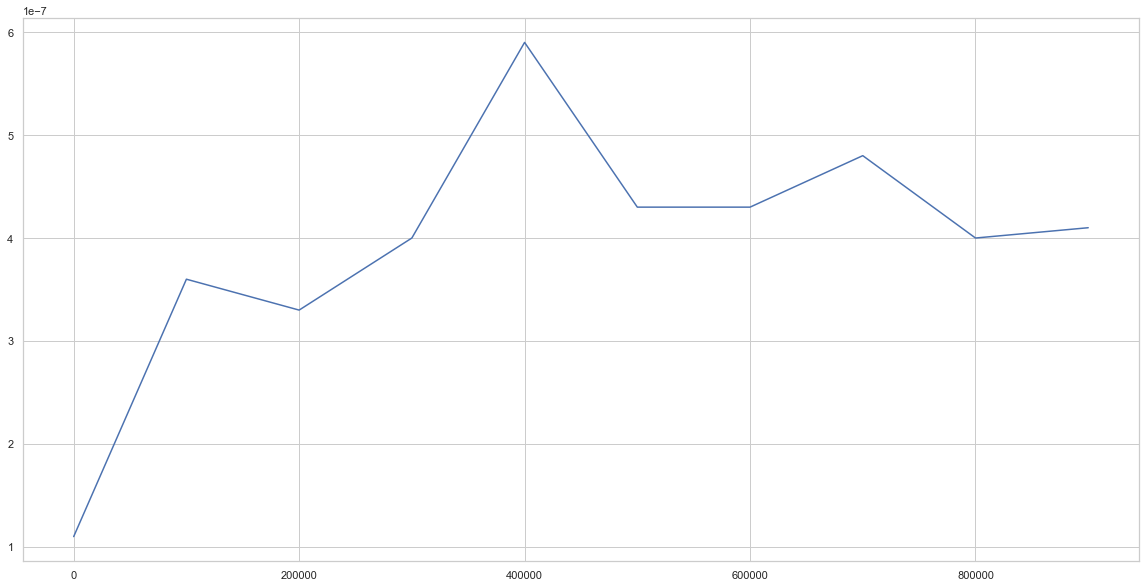

In [124]:
y = [insert_time[el] for el in x]
plt.plot(x, y)  
pass

### Searching

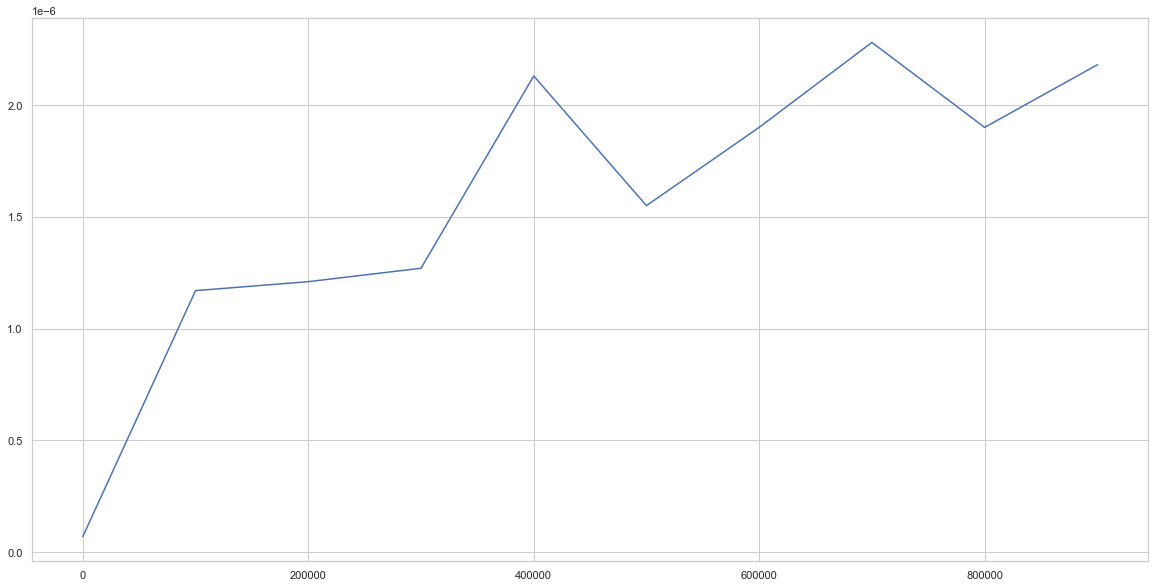

In [125]:
y = [search_time[el] for el in x]
plt.plot(x, y)
pass

### Deletion

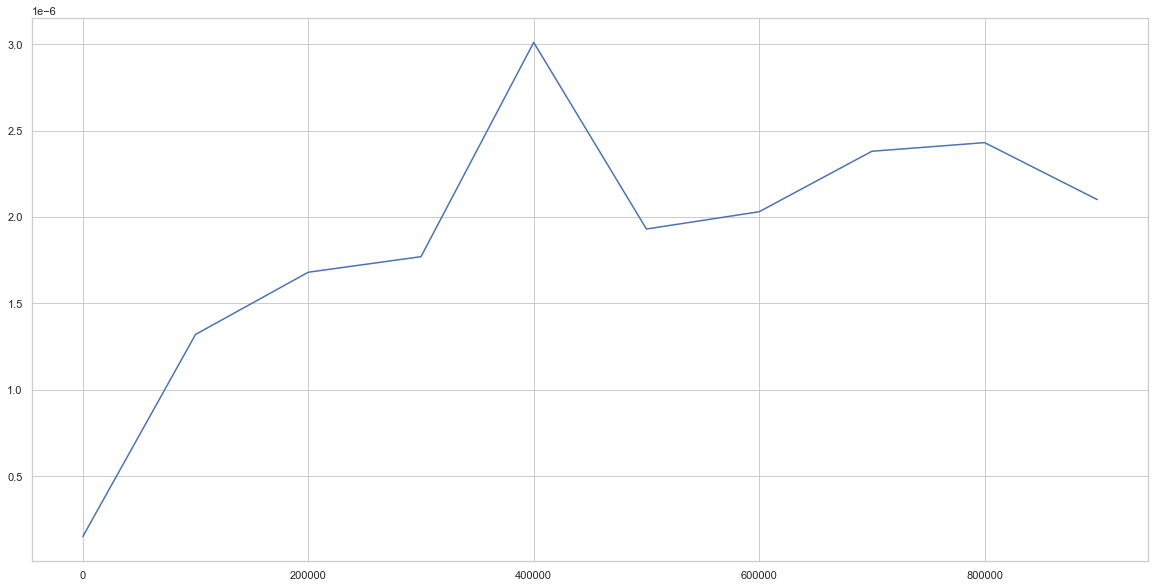

In [126]:
y = [delete_time[el] for el in x]
plt.plot(x, y)
pass

# AVL tree

Сбалансированное двоичное дерево поиска, в котором поддерживается следующее свойство: для каждой его вершины высота её двух поддеревьев различается не более чем на 1. Среднее время выполнения основных операций O(log(n))

In [118]:
insert_time, search_time, delete_time, rotations_count = evaluate(trees.AVLTreeInt(), unique_num_set, True)

Insert, Mean : 0.816408 ms.,  Max 358.540000 ms.
Search, Mean : 1.177885 ms.,  Max 574.080000 ms.
Delete, Mean : 2.357490 ms.,  Max 718.760000 ms.
Total time 88.282613, sec


### Rotations

Количество поворотов при вставке:

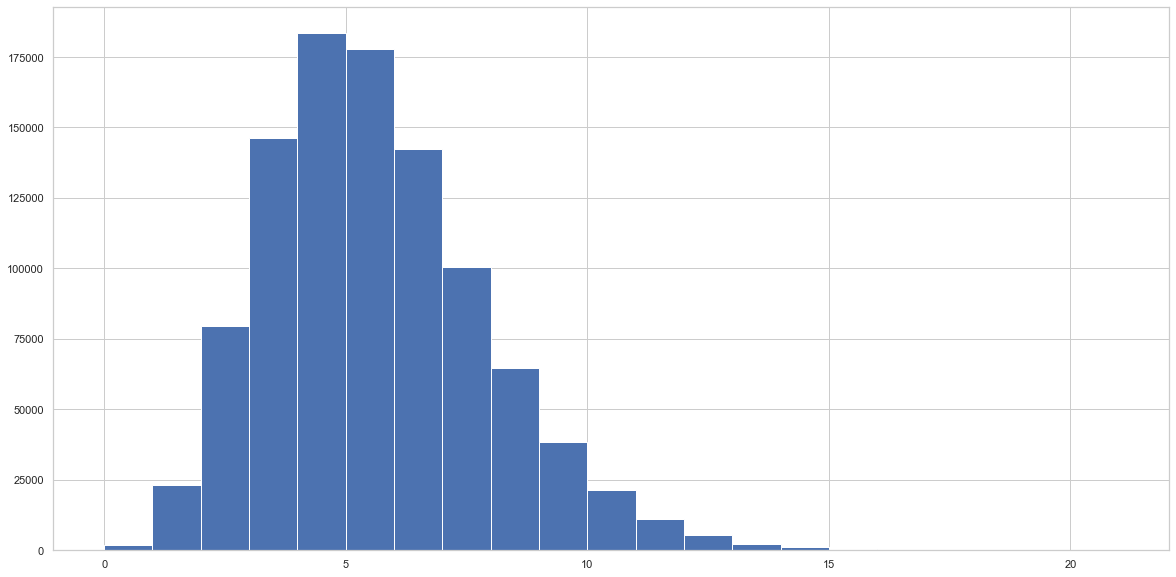

In [19]:
plt.hist(rotations_count, bins = len(set(rotations_count)) )
pass

In [20]:
max(rotations_count)

21

### Insertion

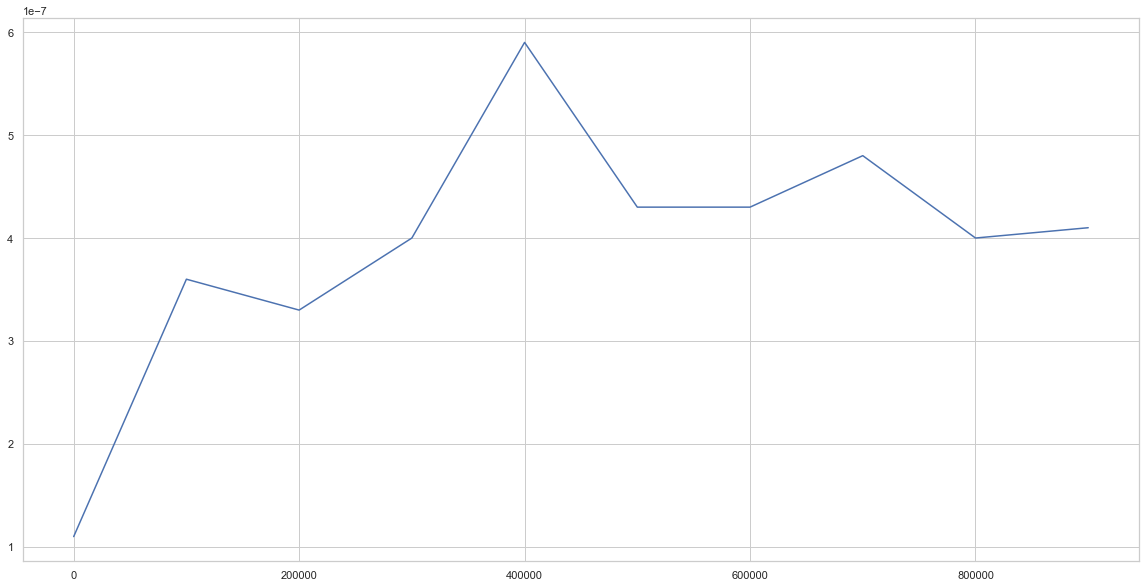

In [132]:
y = [insert_time[el] for el in x]
plt.plot(x, y)
pass

### Searching

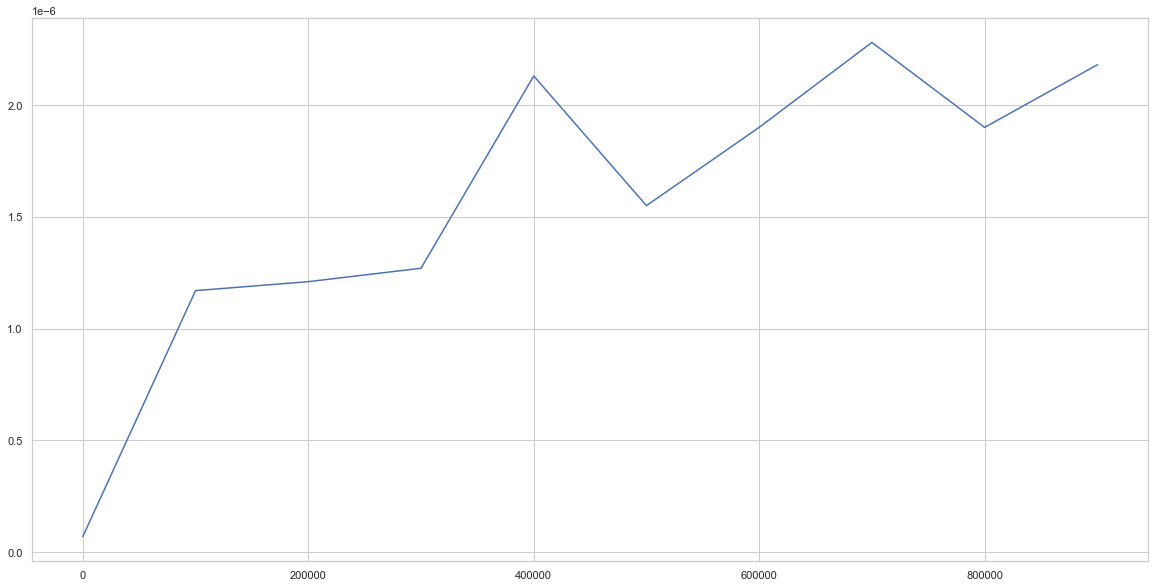

In [133]:
y = [search_time[el] for el in x]
plt.plot(x, y)
pass

### Deletion

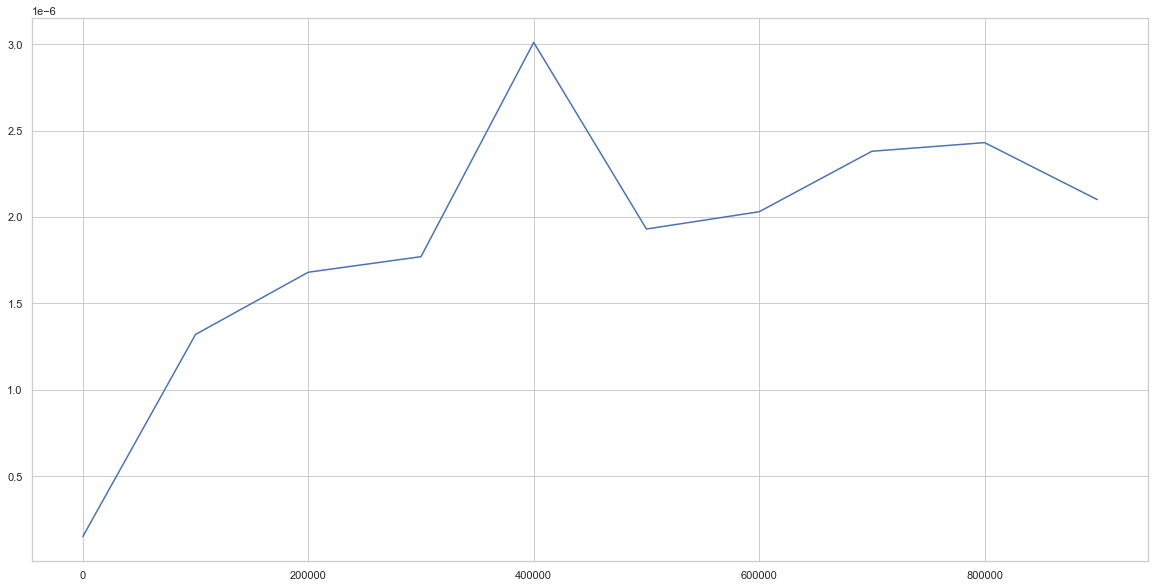

In [134]:
y = [delete_time[el] for el in x]
plt.plot(x, y)
pass

# Treap

In [136]:
insert_time, search_time, delete_time, _ = evaluate(trees.TreapInt(), unique_num_set)

KeyboardInterrupt: 

### Insertion

In [ ]:
y = [insert_time[el] for el in x]
plt.plot(x, y)
pass

### Searching

In [ ]:
y = [search_time[el] for el in x]
plt.plot(x, y)
pass

### Deletion

In [ ]:
y = [delete_time[el] for el in x]
plt.plot(x, y)
pass

# Red-Black tree

In [ ]:
insert_time, search_time, delete_time, _ = evaluate(trees.RBTreeInt(), unique_num_set)

### Insertion

In [ ]:
y = [insert_time[el] for el in x]
plt.plot(x, y)
pass

### Searching

In [ ]:
y = [search_time[el] for el in x]
plt.plot(x, y)
pass

### Deletion

In [ ]:
y = [delete_time[el] for el in x]
plt.plot(x, y)
pass

# Sorted array

In [ ]:
insert_time, search_time, delete_time, _ = evaluate(trees.SortedArrInt(), unique_num_set)

### Insertion

In [ ]:
y = [insert_time[el] for el in x]
plt.plot(x, y)
pass

### Searching

In [ ]:
y = [search_time[el] for el in x]
plt.plot(x, y)
pass

### Deletion

In [ ]:
y = [delete_time[el] for el in x]
plt.plot(x, y)
pass